In [1]:
import sklearn
import tensorflow as tf


%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf


import pandas as pd
import numpy as np
np.random.seed(44) 
import os
import sys
import random
from pymatgen.core import Composition


import tensorflow as tf
from tensorflow import keras
from keras import initializers, regularizers
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

 
import plotly 
import plotly.graph_objs as go
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)

2024-02-24 21:33:38.844626: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-24 21:33:38.932115: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-24 21:33:38.933878: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-24 21:33:40.256835: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data_00="/home/mustapha/Downloads/new_data_majus.csv"
df=pd.read_csv(data_00)
data="https://raw.githubusercontent.com/abd-adhyatma/llzo-improvement/main/llzo_dataset_eda.csv"
df1=pd.read_csv(data)

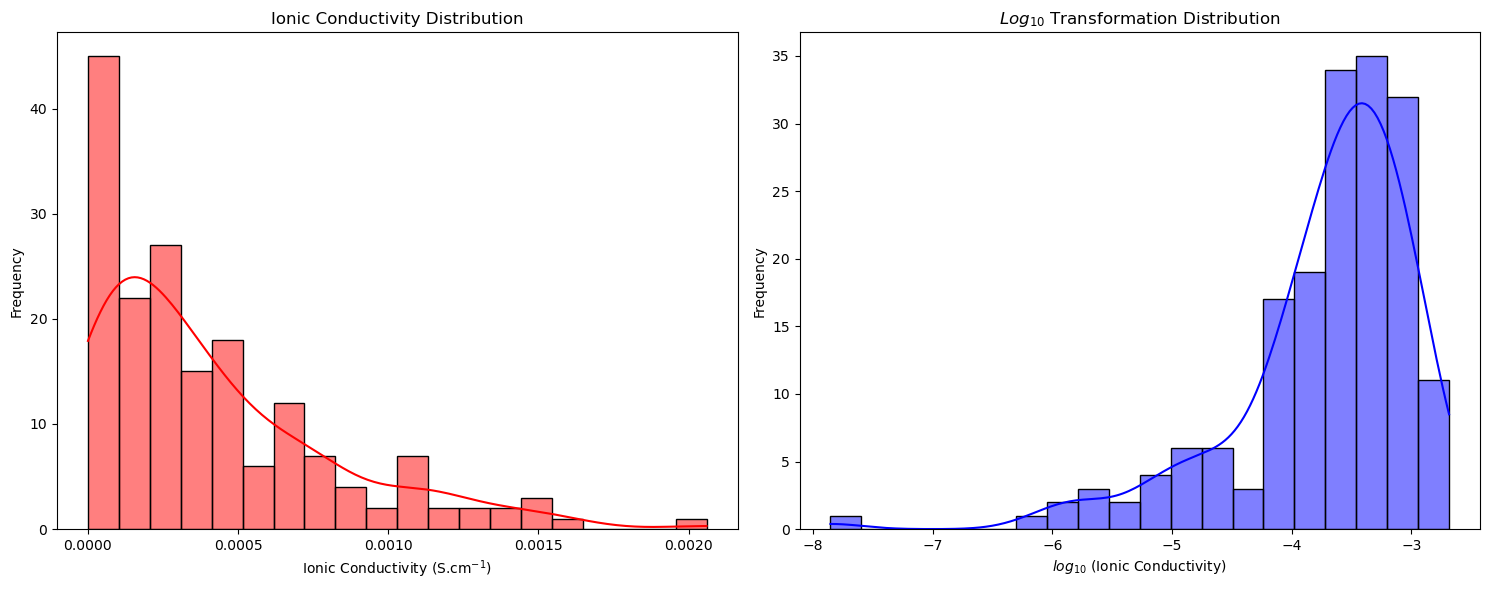

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting ionic conductivity distribution
sns.histplot(data=df, x="Ionic conductivity", bins=20, color='red', edgecolor='black', ax=axes[0], kde=True)
axes[0].set_title('Ionic Conductivity Distribution')
axes[0].set_xlabel('Ionic Conductivity (S.cm$^{-1}$)')
axes[0].set_ylabel('Frequency')

# Plotting log10 transformation distribution 
sns.histplot(data=df, x="log_cond", bins=20, color='blue', edgecolor='black', ax=axes[1], kde=True)
axes[1].set_title('$Log_{10}$ Transformation Distribution')
axes[1].set_xlabel('$log_{10}$ (Ionic Conductivity)')
axes[1].set_ylabel('Frequency')


plt.tight_layout()


plt.show()


In [4]:
lis=np.array(df["Li stoichiometry"])
las=np.array(df["La stoichiometry"])
zrs=np.array(df["Zr stoichiometry"])

lids=np.array(df["Li site dopant stoichiometry"])
lads=np.array(df["La site dopant stoichiometry"])
zrds=np.array(df["Zr site dopant stoichiometry"])

lis1=np.array(df1["Li stoichiometry"])
las1=np.array(df1["La stoichiometry"])
zrs1=np.array(df1["Zr stoichiometry"])

lids1=np.array(df1["Li site dopant stoichiometry"])
lads1=np.array(df1["La site dopant stoichiometry"])
zrds1=np.array(df1["Zr site dopant stoichiometry"])

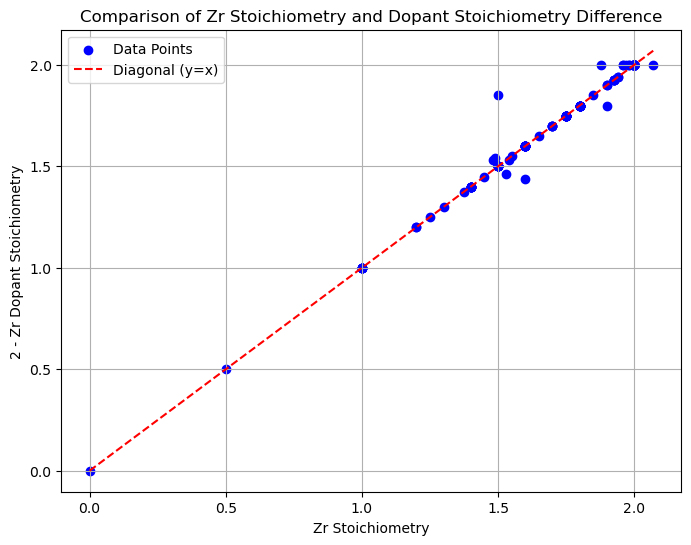

In [5]:
import matplotlib.pyplot as plt
import numpy as np


# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(zrs1, 2 - zrds1, label='Data Points', color='blue')
plt.plot(np.linspace(0, max(zrs1), 100), np.linspace(0, max(zrs1), 100), linestyle='--', color='red', label='Diagonal (y=x)')
plt.xlabel('Zr Stoichiometry')
plt.ylabel('2 - Zr Dopant Stoichiometry')
plt.title('Comparison of Zr Stoichiometry and Dopant Stoichiometry Difference')
plt.legend()
plt.grid(True)
plt.show()


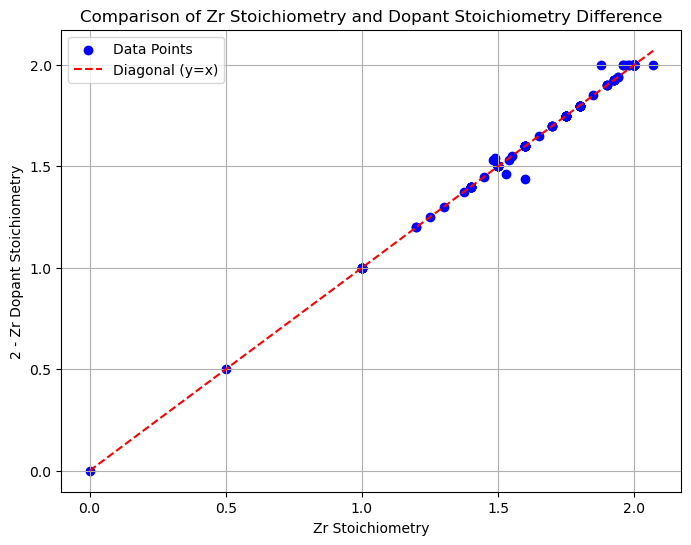

In [6]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(zrs, 2 - zrds, label='Data Points', color='blue')
plt.plot(np.linspace(0, max(zrs), 100), np.linspace(0, max(zrs), 100), linestyle='--', color='red', label='Diagonal (y=x)')
plt.xlabel('Zr Stoichiometry')
plt.ylabel('2 - Zr Dopant Stoichiometry')
plt.title('Comparison of Zr Stoichiometry and Dopant Stoichiometry Difference')
plt.legend()
plt.grid(True)
plt.show()


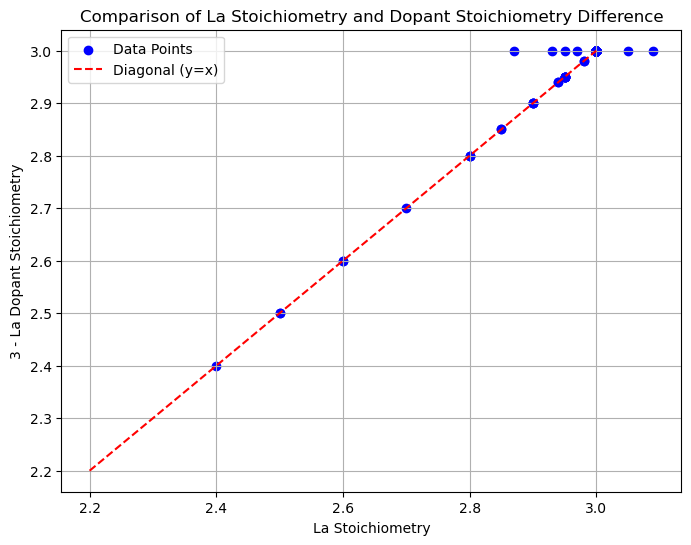

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(las, 3 - lads, label='Data Points', color='blue')
plt.plot(np.linspace(2.2, 3, 100), np.linspace(2.2, 3, 100), linestyle='--', color='red', label='Diagonal (y=x)')
plt.xlabel('La Stoichiometry')
plt.ylabel('3 - La Dopant Stoichiometry')
plt.title('Comparison of La Stoichiometry and Dopant Stoichiometry Difference')
plt.legend()
plt.grid(True)
plt.show()


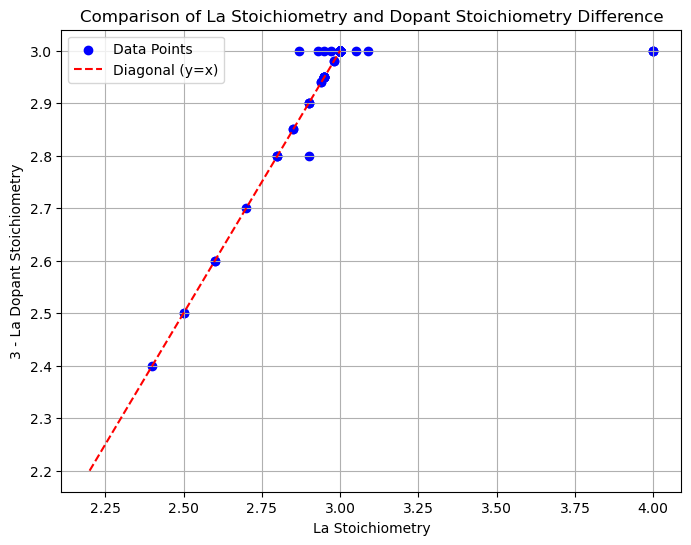

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(las1, 3 - lads1, label='Data Points', color='blue')
plt.plot(np.linspace(2.2,3, 100), np.linspace(2.2,3, 100), linestyle='--', color='red', label='Diagonal (y=x)')
plt.xlabel('La Stoichiometry')
plt.ylabel('3 - La Dopant Stoichiometry')
plt.title('Comparison of La Stoichiometry and Dopant Stoichiometry Difference')
plt.legend()
plt.grid(True)
plt.show()


# Frequency distribution of dopant elements in the dataset

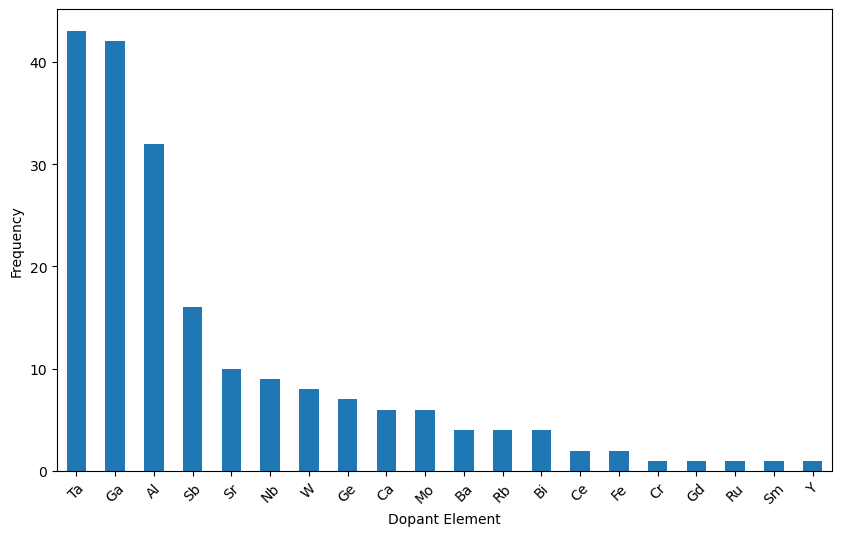

In [9]:
dopant_counts = {}

for column in ['li_dopant', 'la_dopant', 'zr_dopant']:
    dopant_series = df[column]
    
    # Remove NaN or empty values
    dopant_series = dopant_series.dropna().replace('', pd.NA)
    
    counts = dopant_series.value_counts()
    
    # Update the counts in the dictionary
    for element, count in counts.items():
        if element in dopant_counts:
            dopant_counts[element] += count
        else:
            dopant_counts[element] = count

# Create a bar plot to visualize the frequency of dopant elements
plt.figure(figsize=(10, 6))
pd.Series(dopant_counts).sort_values(ascending=False).plot(kind='bar')
# plt.title('Frequency of Dopant Elements in Doped LLZO')
plt.xlabel('Dopant Element')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## Sensitivity Analysis of Relative Density Impact on Ionic Conductivity:

In [10]:
def transform_to_material_formula(row):
    # Extract the values from each column
    a = row['Li stoichiometry']
    b = row['La stoichiometry']
    c = row['Zr stoichiometry']
    x = row['Li site dopant stoichiometry']
    y = row['La site dopant stoichiometry']
    z = row['Zr site dopant stoichiometry']
    M = row['li_dopant']
    N = row['la_dopant']
    K = row['zr_dopant']


    formula = ''


    if a > 0:
        formula += f'Li{a:.1f}'

    # Add M if x > 0
    if x > 0:
        formula += f'{M}{x:.1f}'

    # Add La with its stoichiometry
    if b > 0:
        formula += f'La{b:.2f}'

    # Add N if y > 0
    if y > 0:
        formula += f'{N}{y:.2f}'

    # Add Zr with its stoichiometry
    if c > 0:
        formula += f'Zr{c:.2f}'

    # Add K if z > 0
    if z > 0:
        formula += f'{K}{z:.2f}'
        
    formula += f'O12'
   
    return formula



# Assuming you have a DataFrame named 'df' and want to create a new column 'MaterialFormula'
df['MaterialFormula'] = df.apply(transform_to_material_formula, axis=1)

In [11]:
# df = df[df['Doping strategy'] != 'Combined']
# df.reset_index(drop=True, inplace=True)

material_counts = df['MaterialFormula'].value_counts()

# Get the material formula with the highest count
most_repeated_material = material_counts.idxmax()

# Get the count of the most repeated material
top_3_materials = material_counts.nlargest(3)

# Print the result
print("The top 3 most repeated materials are:")
for material, count in top_3_materials.items():
    print(f"{material}: {count} times")

The top 3 most repeated materials are:
Li6.5La3.00Zr1.50Ta0.50O12: 9 times
Li6.2Al0.2La3.00Zr2.00O12: 8 times
Li6.5Ga0.1La3.00Zr2.00O12: 7 times


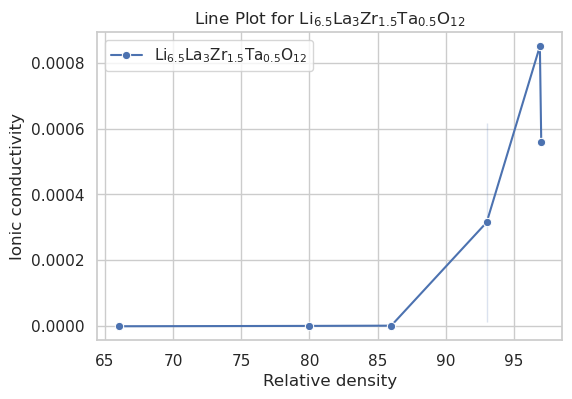

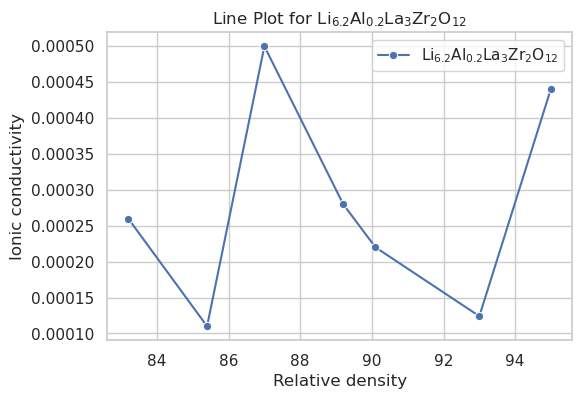

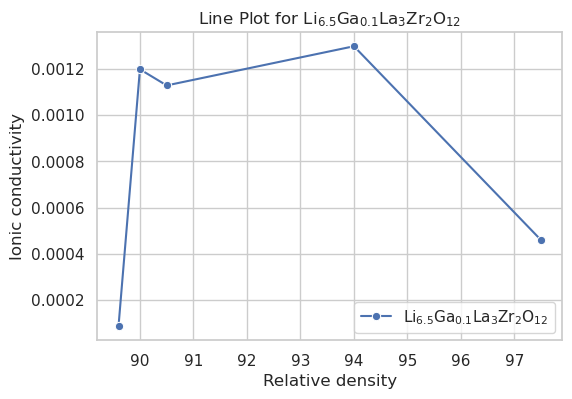

In [36]:


# Counting the occurrences of each material formula
material_counts = df['MaterialFormula'].value_counts()

# Getting the top 3 most repeated materials
top_3_materials = material_counts.nlargest(3)


sns.set(style="whitegrid")

# The chemical formulas of the most repeated materials
chemical_formulas = [
    r"$\mathrm{Li}_{6.5}\mathrm{La}_3\mathrm{Zr}_{1.5}\mathrm{Ta}_{0.5}\mathrm{O}_{12}$",
    r"$\mathrm{Li}_{6.2}\mathrm{Al}_{0.2}\mathrm{La}_3\mathrm{Zr}_2\mathrm{O}_{12}$",
    r"$\mathrm{Li}_{6.5}\mathrm{Ga}_{0.1}\mathrm{La}_{3}\mathrm{Zr}_{2}\mathrm{O}_{12}$"
]

for selected_material, label in zip(top_3_materials.index, chemical_formulas):
    selected_material_data = df[df['MaterialFormula'] == selected_material]
    plt.figure(figsize=(6, 4))
    sns.lineplot(
        x='Relative density',
        y='Ionic conductivity',
        data=selected_material_data,
        marker='o',
        label=label,
    )
    plt.title(f'Line Plot for {label}')
    plt.xlabel('Relative density')
    plt.ylabel('Ionic conductivity')
    plt.legend()
    plt.show()
